# Natural Language Processing (NLP)

Author: Roy T. Forestano

Began: 2025 September 19

Notes from the book Deep Learning with Python by Francois Chollet. Code suggested but modified considerably and written in PyTorch as opposed to Keras, as in the text.

## Section 1: Deep Learning for Text

Chapter 11: Deep Learning for Text from the book Deep Learning with Python by Francois Chollet.

- Preprocessing test data for ML applications
- Bag-of-words approaches and sequence-modeling approaches for text processing
- The Transformer Architecture
- Sequence-to-Sequence learning

### 11.1 Natural Language Processing: The bird's eye view

- Language for computers is designed with rules first then usage
    - Highly structured and rigorous
    - Precise syntactic rules
    - Defined concepts
    - Fixed vocabulary
- Natural language is used first, shaped by evolution, then rules are formalized
    - Messy, ambiguous, chatic, sprawiling
    - Constantly in flux

- History
    - 1960s: Applied Linguistics: ELIZA with rules for pattern matching
    - 1980s: more data, Decision Trees to automate if/then/else rules of previous systems
    - 1980s: statistical approahces like logitic regression, learned parametric models


- Modern Natural Language Processing
    - use ML and large datasets to give computers the ability to take a piece of language as input and return something meanignful, not to understand language like in the past
    - RNN
    - LSTM
    - Transformer
    - Reinforcement Learning


### 11.2 Preparing Text Data

***Vectorizing:*** process of transforming text into numeric tensors. 
- Standardize: make all lowercase, remove punctuation, use stemming to make all conjugated verbs the same.
- Tokenization: split the text into units (tokens), such as characters, words, or groups of words
- Indexing: index all tokens present in the data
- Vectorize: turn each token into a numerical vector through one-hot encoding or embedding techniques

11.2.1 Standardization

- Lowercase
- Remove punctutation, if needed, make as a separate token
- Convert special characters to a standard form, e.g. accent marks
- Stemmming: convert variations of a verb into a single representation

11.2.2 Text splitting (tokenization)

- Break up text into units to be vectorized (tokens)
    - Word-level tokenization: tokens are space separated (or puncutation separated) substrings. Also, one can split words into subwords, e.g. staring to star+ing or called to call_ed
    - N-gram tokenization: tokens are groups of N consecutive words
    - Character-level tokenization: tokerns are characters (rarely used, only in specialized contexts, such as textgeneration or speech recognition)

***Sequence Models***: care about word order
    - Word level tokenization
***Bag-of-words***: treat input words as a set
    - N-gram tokenization (preserves local word order)

Note: Deep learning sequence moels such as 1D convnets, recurrent NN, and Transformers are capable of learning representations for groups of words without being explicitly told about the existence of such groups by looking at continuous word or character sequences.

11.2.3 Vocabulary Indexing 

- Tokens must then be converted to numerical representations
- Start by indexing the tokens you have
- Common to limit the vocabulary to the top 20k-30k most common words

- If words are not in vocabulary training data, to avoid KeyError, make an out of vocabulary (OOV) index, e.g. vocabulary.get(token,1) i.e. get the token if it exists otherwise get 1
- Typically, also need a mask token at index 0 to make word sequences the same length, i.e. pad all sequences to the longest length



In [18]:
'''
If using google colab, uncomment below lines
'''

# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)

# !pip install torch
# !pip install numpy

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# path = '/content/drive/MyDrive/research/lanl/code/'
# directory = path
# os.chdir(directory)
# print(os.getcwd())

'\nIf using google colab, uncomment below lines\n'

In [ ]:
vocabulary = {} 
for text in dataset:
    text = standardize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = len(vocabulary) # add the token in dictionary with index at end

# Can be converted to a vector encoding: e.g. One-Hot encoding
def one_hot_encode_token(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1
    return vector

In [1]:
# Manual
import string

class Vectorizer:
    def standardize(self,text):
        text = text.lower()
         # remove punctuation and rejoin characters
        return "".join(char for char in text if char not in string.punctuation)
    
    def tokenize(self, text):
       text = self.standardize(text)
       return text.split()
    
    def make_vocabulary(self, dataset):
        self.vocabulary = {"":0, "[UNK]": 1}
        for text in dataset:
          text = self.standardize(text)
          tokens = self.tokenize(text)
          for token in tokens:
             if token not in self.vocabulary:
                self.vocabulary[token] = len(self.vocabulary)
        self.inverse_vocabulary = dict((value, key) for key, value in self.vocabulary.items())
    

    def encode(self,text):
       text = self.standardize(text)
       tokens = self.tokenize(text)
       return [self.vocabulary.get(token,1) for token in tokens]
    
    def decode(self, int_sequence):
       return " ".join(self.inverse_vocabulary.get(i,"[UNK]") for i in int_sequence)

[2, 3, 5, 7, 1, 5, 6]
i write rewrite and [UNK] rewrite again


In [ ]:
# Example
vectorizer = Vectorizer()
dataset = ["I write, erase, rewrite",
           "Erase again, and then",
           "A poppy blooms."]
vectorizer.make_vocabulary(dataset)

test_sentence = "I write, rewrite, and still rewrite again"
encoded_sentence = vectorizer.encode(test_sentence)
print(encoded_sentence)
decoded_sentence = vectorizer.decode(encoded_sentence)
print(decoded_sentence)

In [ ]:
'''
Kernel crashed with tensorflow
Even when trying to reconfigure with compatible packages, more errors arose
'''

# Keras
# import tensorflow
# print(tensorflow.__version__)
# from tensorflow.keras.layers import TextVectorization
# from tensorflow import keras
# text_vectorization = TextVectorization(max_tokens=None,
#                                         standardize='lower_and_strip_punctuation',
#                                         split='whitespace',
#                                         ngrams=None,
#                                         output_mode='int',
#                                         output_sequence_length=None,
#                                         pad_to_max_tokens=False,
#                                         vocabulary=None,
#                                         idf_weights=None,
#                                         sparse=False,
#                                         ragged=False,
#                                         encoding='utf-8',
#                                         name=None)

# # Build custom standardize and tokenize (split) functions
# import re
# import string
# import tensorflow as tf

# def custom_standardization_fn(string_tensor):
#     lowercase_string = tf.strings.lower(string_tensor)
#     return tf.strings.regex_replace(lowercase_string, f"[{re.escape(string.punctuation)}]", "")

# def custom_split_fn(string_tensor):
#     return tf.strings.split(string_tensor)
# 
# 
# text_vectorization = TextVectorization( output_mode = 'int',
#                                         standardize = custom_standardization_fn,
#                                         split = custom_split_fn)

# dataset = ["I write, erase, rewrite",
#            "Erase again, and then",
#            "A poppy blooms."]
# text_vectorization.adapt(dataset)
# print(text_vectorization.get_vocabulary())

# vocabulary = text_vectorization.get_vocabulary()
# test_sentence = "I write, rewrite, and still rewrite again"
# encoded_sentence = text_vectorization(test_sentence)
# print(encoded_sentence)
# inverse_vocab = dict(enumerate(vocabulary))
# decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
# print(decoded_sentence)

# # Using the TextVectorization layer in a tf.data pipeline or as part of a model

# # Option 1: Pipeline - enables you to do asynchronous processing of your data on the CPU. While the GPU runs the model,
# # on one batch of vectorized data, the CPU stays busy by vectorizing the next batch of strings
# # Go with this if running on GPU or TPU

# int_sequence_dataset = string_dataset.map(text_vectorization,num_parallel_calls  = 4)

# # Option 2: Part of the model - vectorization happens synchronously with the model
# text_input = keras.Input(shape=(), dtype='string')
# vectorized_text = text_vectorization(text_input)
# embedded_input = keras.layers.Embedding(len(vocabulary),6)(vectorized_text) # Embed words in sentence as vectors themselves
# # output =
# model = keras.Model(text_input,output)

: 

Word Embeddings: Encoding Lexical Semantics: https://docs.pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html

Embedding: https://docs.pytorch.org/docs/stable/generated/torch.nn.Embedding.html

In [8]:
# Pytorch - kind of
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchtext.vocab import vocab # torchtext is being deprecated

from collections import Counter, OrderedDict

torch.manual_seed(1)

counter = Counter(["a", "a", "b", "b", "b"])
sorted_by_freq_tuples = sorted(counter.items(), key=lambda x: x[1], reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)
# v1 = vocab(ordered_dict)
print(ordered_dict['a']) #prints 1, old is v1
# print(ordered_dict['out of vocab']) #raise RuntimeError since default index is not set, old is v1
tokens = ['e', 'd', 'c', 'b', 'a']
#adding <unk> token and default index
unk_token = '<unk>'
default_index = -1
od2 = OrderedDict([('',0),(unk_token,1)]+[(token, 1) for token in tokens])
# v2 = vocab(OrderedDict([(token, 1) for token in tokens]), specials=[unk_token])
# v2.set_default_index(default_index)
print(od2['<unk>']) #prints 0
# print(od2['out of vocab']) #prints -1
#make default index same as index of unk_token
# v2.set_default_index(v2[unk_token])
# v2['out of vocab'] is v2[unk_token] #prints True

# from torchtext.vocab import vocab
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(len(word_to_ix), 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(lookup_tensor)
print(hello_embed)
lookup_tensor2 = torch.tensor([word_to_ix["world"]], dtype=torch.long)
world_embed = embeds(lookup_tensor2)
print(world_embed)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

2
1


### 11.3 Two approaches for representing groups of words: Sets and sequences

 - How ML models should represent individual words is known since they are categorical features
    - can be encoded as dimensions in a feature space
    - or as category (word) vectors
 - Difficulty in how to encode word order, or the way words are woven into sentences

 Some options

 - Bag-of-words: discard order and treat text as an unordered set of words
 - RNN: like steps in a timeseries, process words in the order in which they appear one at a time
 - Hybrid-approach (Transformer): order-agnostic but uses word-position information in the representations it processes which enables it to simultaneously look at different parts of a sentence (unlike RNNs) while still being order-aware

 Note: RNNs and Transformers are sequence models since they take into account word order

In [ ]:
'''
Book shows how to do this manually again from the Stanford page of Andrew Maas

Start in terminal in the directory of interest and download the data
'''

# !curl  -O https://ai.stanford.edu/~amaas/data/sentiment/ac1Imdb_v1.tar.gz
# !tar -xf ac1Imdb_v1.tar.gz

'''
The file will contain train (25k) and test (25k) folders with positive and negative reviews
delete train/unsup directory
'''

# !rm -r ac1Imdb/train/unsup

'''
View the content of a few of these files to inspect what your data looks like beforfe modelling it. 
It will help in understanding what the model is doing.
'''

#!cat ac1Imdb/train/pos/4077_10.txt

'''
Prepare a validation set of 20% of training text files in a new directory, namely ac1Imdb/val
'''

# import os, pathlib, shutil, random

# base_dir = pathlib.Path("ac1Imdb")
# val_dir = base_dir/"val"
# train_dir = base_dir / "train"

# for category in ("neg","pos"):
#     os.makedirs(val_dir/category)
#     files = os.listdir(train_dir/category)
#     random.Random(1337).shuffle(files)
#     num_val_samples = int(0.2*len(files))
#     val_files = files[-num_val_samples:]
#     for fname in val_files:
#         shutil.move(train_dir/category/fname, val_dir/category/fname)

'''
Create a batched Dataset object with labels from a directory
'''

# from tensorflow import keras
# batch_size = 32
# train_ds = keras.utils.text_dataset_from_directory("ac1Imdb/train",
#                                                    batch_size = batch_size)
# test_ds = keras.utils.text_dataset_from_directory("ac1Imdb/test",
#                                                   batch_size = batch_size)

'''
Inputs are TensorFlow tf.string tensors, targets are int32 tensors with either a 0 or 1 (binary classification)
'''

# for inputs, targets in train_ds:
#     print("inputs.shape:", inputs.shape)
#     print("inputs.dtype:", inputs.dtype)
#     print("targets.shape:", targets.shape)
#     print("targets.dtype:", targets.dtype)
#     print("inputs[0]:",inputs[0])
#     print("targets[0]:",targets[0])

In [ ]:
# Need version 0.18.0
# import torchtext
# # Need version 2.3.0
# import torch
# print(torchtext.__version__)
# print(torch.__version__)

0.18.0
2.3.0


## Sequence classification learning

### 11.3.2 Processing words as a set: The bag-of-words approach

- Vector with indices of words
- Multihot encoding of N-grams
- TD-IDF encoding of N-grams

### Download, Preprocess, Tokenize the data

In [1]:
'''
Do it with Hugging Face Datasets / PyTorch and avoid the manuals step

Hugging Face Datasets: https://huggingface.co/docs/datasets/en/index
'''
# # import datasets
# from torchtext.datasets import IMDB

# train_iter = IMDB(split='train')
# train_iter = IMDB(split='test')

# def tokenize(label, line):
#     return line.split()

# tokens = []
# for label, line in train_iter:
#     tokens += tokenize(label, line)
from utils import *
# Load IMDB dataset
dataset = load_dataset("imdb")

# Apply preprocessing to *entire dataset*
dataset = dataset.map(preprocess)

# Now split into train/validation/test
split_dataset = dataset["train"].train_test_split(test_size=0.2, seed=42)
train_data = split_dataset["train"]
val_data   = split_dataset["test"]
test_data  = dataset["test"]

# # Split into train/test
# index_train = 20000
# train_data = dataset["train"].select(range(0, index_train))
# val_data   = dataset["train"].select(range(index_train, len(dataset["train"])))
# test_data = dataset["test"]

# Example: inspect a sample
print('Text:',train_data[0]['text'])  # {'text': 'A very, very, very slow-moving, aimless movie...', 'label': 0}
print('Label:',train_data[0]['label'])
# Tokenization (basic example), N-grams with binary encoding
ngram_size = 2
tokenize_with_ngrams = partial(tokenize, ngram_size = ngram_size)

# Apply tokenization
train_tokens = train_data.map(tokenize_with_ngrams, batched=False)
val_tokens = val_data.map(tokenize_with_ngrams, batched=False)
test_tokens = test_data.map(tokenize_with_ngrams, batched=False)

print('Tokens:',train_tokens[0]["tokens"][:10])


Device:  cpu
Text: stage adaptations often have a major fault they often come out looking like a film camera was simply placed on the stage such as night mother sidney lumets direction keeps the film alive which is especially difficult since the picture offered him no real challenge still its nice to look at for what it is the chemistry between michael caine and christopher reeve is quite brilliant the dynamics of their relationship are surprising caine is fantastic as always and reeve gets one of his few chances to really actbr br i confess that ive never seen ira levins play but i hear that jay presson allens adaptation is faithful the script is incredibly convoluted and keeps you guessing deathtrap is an enormously entertaining film and is recommended for nearly all fans of stage and screenbr br 74 out of 10
Label: 1
Tokens: ['stage', 'stage adaptations', 'adaptations', 'adaptations often', 'often', 'often have', 'have', 'have a', 'a', 'a major']


In [2]:
dir(dataset["train"])[-30:-25]

['search', 'search_batch', 'select', 'select_columns', 'set_format']

In [3]:
dataset.keys()

dict_keys(['train', 'test', 'unsupervised'])

In [4]:
train_tokens

Dataset({
    features: ['text', 'label', 'tokens'],
    num_rows: 20000
})

### Make vocabulary, vectorize the data (sequence), and create train/test/val dataloaders

In [ ]:
torch.manual_seed(0)

max_vocab_length = 20000
vocab = create_vocab(dataset,tokenizer=tokenize_with_ngrams,maximum_words_in_vocab=max_vocab_length)

vectorizing_function = VecFuncs(vocab).vectorize_fn_tf_idf
collate_with_vocab = partial(collate_fn, vocab = vocab, vect_function=vectorizing_function)

batch_size = 32
train_loader = DataLoader(train_tokens, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        collate_fn=collate_with_vocab)

val_loader = DataLoader(val_tokens, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        collate_fn=collate_with_vocab)

test_loader = DataLoader(test_tokens, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        collate_fn=collate_with_vocab)

In [ ]:
for batch in train_loader:
    print('Keys:',batch.keys())
    print('Token vectors:',batch["tokens"])
    print('Labels:',batch["label"])
    print('Lengths:',batch["lengths"])
    print('Shapes:',batch['tokens'].shape,batch['label'].shape)
    break
print('Vocabulary Size: ', len(vocab))

Keys: dict_keys(['tokens', 'label'])
Token vectors: tensor([[0.0000, 1.4427, 0.0890,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.4427, 0.6231,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.4427, 0.5341,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 1.4427, 0.2671,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.4427, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 1.4427, 0.4451,  ..., 0.0000, 0.0000, 0.0000]])
Labels: tensor([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0])
Shapes: torch.Size([32, 20000]) torch.Size([32])


### Initialize Model and Train

In [ ]:
torch.manual_seed(0)
# Model Hyperparameters
epochs = 10
learning_rate = 1e-3 # want this to be 10^-2 - 10^-4
hidden_dim = 16 # defines hidden dense layer size
loss_fn = nn.BCELoss() #BCELoss
# Initialize model and optimizer
model = BinaryClassifier(input_size = batch['tokens'].shape[1], hidden_dim = hidden_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
number_of_parameters = 0
for i,params in enumerate(model.parameters()):
  number_of_parameters += params.flatten().shape[0]
print('Number of Parameters: ', number_of_parameters)

Number of Parameters:  320033


In [9]:
torchinfo.summary(model, input_data=torch.randn(batch_size,20000))

Layer (type:depth-idx)                   Output Shape              Param #
BinaryClassifier                         [32, 1]                   --
├─Sequential: 1-1                        [32, 1]                   --
│    └─Linear: 2-1                       [32, 16]                  320,016
│    └─ReLU: 2-2                         [32, 16]                  --
│    └─Dropout: 2-3                      [32, 16]                  --
│    └─Linear: 2-4                       [32, 1]                   17
│    └─Sigmoid: 2-5                      [32, 1]                   --
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 10.24
Input size (MB): 5.12
Forward/backward pass size (MB): 0.01
Params size (MB): 2.56
Estimated Total Size (MB): 7.69

In [10]:
training_history = training(train_loader,
                            val_loader,
                            epochs,
                            loss_fn,
                            model,
                            optimizer,
                            regularize = False)

 10%|█         | 1/10 [01:23<12:34, 83.79s/it]

Epoch: 0 | Train Loss: 0.66802324 | Val Loss: 0.61412725 | Best Val Loss: 0.61412725 | Accuracy: 0.78280000


 20%|██        | 2/10 [02:53<11:37, 87.14s/it]

Epoch: 1 | Train Loss: 0.60009542 | Val Loss: 0.57832820 | Best Val Loss: 0.57832820 | Accuracy: 0.86020000


 30%|███       | 3/10 [04:26<10:28, 89.81s/it]

Epoch: 2 | Train Loss: 0.57374268 | Val Loss: 0.56872423 | Best Val Loss: 0.56872423 | Accuracy: 0.87520000


 40%|████      | 4/10 [06:06<09:24, 94.10s/it]

Epoch: 3 | Train Loss: 0.56241536 | Val Loss: 0.56454674 | Best Val Loss: 0.56454674 | Accuracy: 0.87860000


 50%|█████     | 5/10 [07:54<08:15, 99.05s/it]

Epoch: 4 | Train Loss: 0.55373628 | Val Loss: 0.56262749 | Best Val Loss: 0.56262749 | Accuracy: 0.88000000


 60%|██████    | 6/10 [09:46<06:53, 103.50s/it]

Epoch: 5 | Train Loss: 0.54863495 | Val Loss: 0.56123251 | Best Val Loss: 0.56123251 | Accuracy: 0.87920000


 70%|███████   | 7/10 [11:38<05:18, 106.20s/it]

Epoch: 6 | Train Loss: 0.54309451 | Val Loss: 0.56052426 | Best Val Loss: 0.56052426 | Accuracy: 0.87820000


 80%|████████  | 8/10 [13:32<03:37, 108.63s/it]

Epoch: 7 | Train Loss: 0.53901934 | Val Loss: 0.56024124 | Best Val Loss: 0.56024124 | Accuracy: 0.87680000


 90%|█████████ | 9/10 [15:26<01:50, 110.47s/it]

Epoch: 8 | Train Loss: 0.53591238 | Val Loss: 0.56182462 | Best Val Loss: 0.56024124 | Accuracy: 0.87760000


100%|██████████| 10/10 [17:22<00:00, 104.24s/it]

Epoch: 9 | Train Loss: 0.53327498 | Val Loss: 0.56161735 | Best Val Loss: 0.56024124 | Accuracy: 0.87820000
Training Complete. Total Time (s): 1042.4396390914917


### Evaluate Model

In [12]:
# --- Saving ---
# torch.save(model.state_dict(), "weights/binaryclassifier_model.pth")

# --- Loading ---
# create model instance
model = BinaryClassifier(input_size = batch['tokens'].shape[1], hidden_dim = hidden_dim).to(device) 
model.load_state_dict(torch.load("weights/binaryclassifier_model.pth"))
model.eval()   # set to eval mode for inference

BinaryClassifier(
  (bc): Sequential(
    (0): Linear(in_features=20000, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [13]:
training_history['history'].keys()

dict_keys(['train_loss', 'val_loss', 'accuracy', 'weights', 'components_loss'])

In [14]:
# np.save(data_path+f'train_su{2**qubit_number}_su{2**mod_fraction}_lay{n_layers}_ep{epochs}_lr{lr}_param{count}.npy',model_history['history']['train_loss'])
# np.save(data_path+f'weights_su{2**qubit_number}_su{2**mod_fraction}_lay{n_layers}_ep{epochs}_lr{lr}_param{count}.npy',model_history['history']['weights'][0])

Text(0.5, 0, 'Epoch')

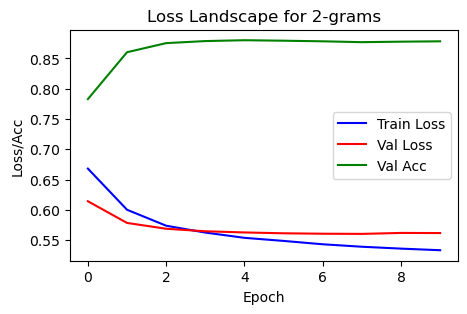

In [16]:
plt.figure(figsize=(5,3))
epoch_list = [i for i in range(epochs)]
plt.plot(epoch_list,training_history['history']['train_loss'],label= 'Train Loss',c='b')
plt.plot(epoch_list,training_history['history']['val_loss'],label= 'Val Loss',c='r')
plt.plot(epoch_list,training_history['history']['accuracy'], label = 'Val Acc',c='g')
plt.legend()
plt.title(f'Loss Landscape for {ngram_size}-grams')
plt.ylabel('Loss/Acc')
plt.xlabel('Epoch')
# plt.savefig("loss.png", bbox_inches="tight")

Check Test Data
- Confusion Matrix
- Accuracy
- ROC Curve
- ROC AUC Score
- PR AUC Curve
- PR Score
- F1 Score


20 Evaluation Metrics for Binary Classification: https://neptune.ai/blog/evaluation-metrics-binary-classification

1. Confusion Matrix

- True Positive (TP): those samples correctly classfied as positive
- True Negative (TN): those samples correctly classified as negative
- False Positive (FP): negative samples classified as positive
- False Negative (FN): positive samples classified as negative

$$
CM = 
\begin{pmatrix}
        TN & FP \\
        FN & TP
\end{pmatrix}
$$

True vs. Predicted table axes.

2. Accuracy

$$
ACC = \frac{correct}{total} = \frac{TP+TN}{TP+FP+TN+FN}
$$

- False Positive Rate (type I error):

$$
FPR = \frac{FP}{all-negative} = \frac{FP}{FP+TN}
$$

- False Negative Rate (type II error):

$$
FNR = \frac{FN}{all-positive} = \frac{FN}{FN+TP}
$$

- True Negative Rate (specificity):

$$
TNR = \frac{TN}{all-negative} = \frac{TN}{FP+TN}
$$

- True Positive Rate (recall/sensitivity):

$$
TPR = \frac{TP}{all-positive} = \frac{TP}{FN+TP}
$$

- Negative Predictive Value

$$
NPV = \frac{TN}{all-negative-pred} = \frac{TN}{FN+TN}
$$

- False Discovery Rate

$$
FDR = \frac{FP}{all-positive-pred} = \frac{FP}{FP+TP}
$$

- Positive Predictive Value (precision)

$$
PPV = \frac{TP}{all-positive-pred} = \frac{TP}{TP+FP}
$$

3. F beta Score

$$
F_\beta = (1+\beta^2) \frac{precision*recall}{\beta^2*precision+recall} =  (1+\beta^2) \frac{PPV*TPR}{\beta^2*PPV+TPR}
$$

The F1 Score is when $\beta =1$. F2 Score is when $\beta =2$.


4. ROC Curve
5. ROC AUC Score
6. Precision-Recall Curve
7. PR AUC Score (average precision)

Others not dicussed here:
- Cohen kappa metric
- Matthews correlation coefficient (MCC)
- Brier Score

In [ ]:
correct_predictions = 0
total_predictions = 0
model.to(device)
model.eval()
with torch.inference_mode():
        for batch_idx, batch in enumerate(test_loader):#tqdm(enumerate(train_loader)):
                input_data = batch['tokens'].to(device).to(torch.float64)
                lengths_data = batch['lengths'].to(device)
                label_data = batch['label'].to(device).to(torch.float64).unsqueeze(1)
                
                predictions = (model(input_data,lengths_data)>0.5).long()
                correct_predictions += (label_data.long()==predictions).sum().item()
                total_predictions += label_data.shape[0]

accuracy = correct_predictions / total_predictions
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.87556


              precision    recall  f1-score   support

         0.0     0.8645    0.8908    0.8774     12500
         1.0     0.8874    0.8603    0.8736     12500

    accuracy                         0.8756     25000
   macro avg     0.8759    0.8756    0.8755     25000
weighted avg     0.8759    0.8756    0.8755     25000



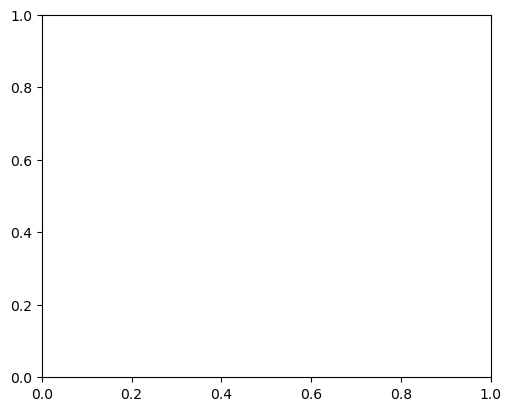

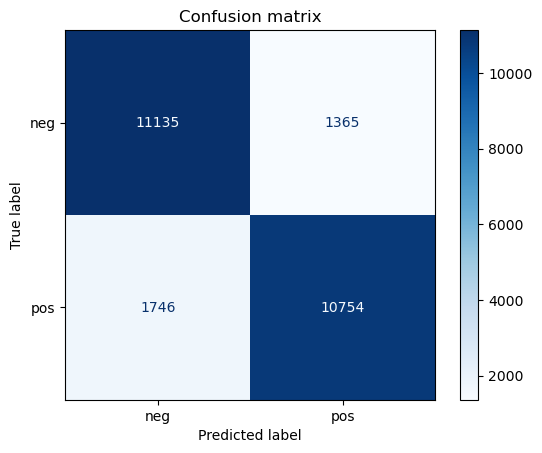

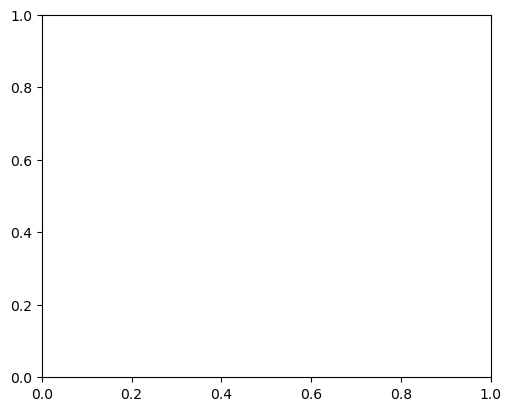

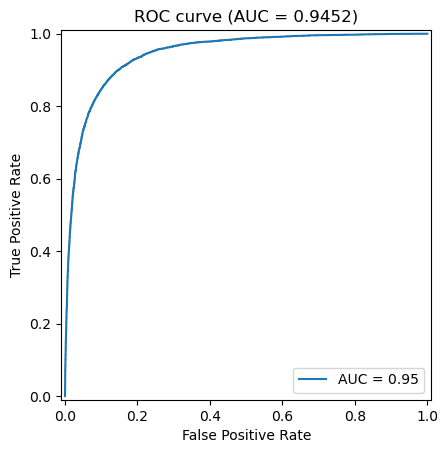

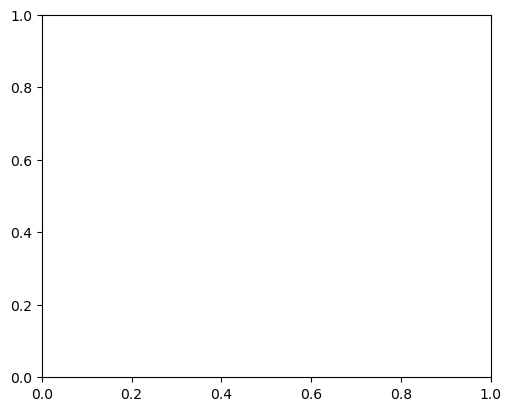

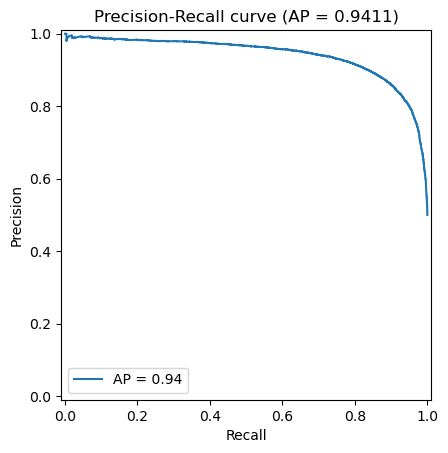

Best threshold by F1: 0.13 F1: 0.8795933413526833


In [18]:
y_true, y_pred, y_probs = outputs(model, test_loader, device=device)
metrics = compute_metrics(y_true, y_pred, y_probs)
print(metrics['report'])
plot_confusion_matrix(y_true, y_pred, normalize=None)   # or normalize='true'
# plt.savefig("confusion.png", bbox_inches="tight")
plot_roc_curve(y_true, y_probs)
# plt.savefig("roc.png", bbox_inches="tight")
plot_precision_recall(y_true, y_probs)
# plt.savefig("precisionrecall.png", bbox_inches="tight")
best_t, best_f1, sweep = threshold_sweep(y_true, y_probs)
print("Best threshold by F1:", best_t, "F1:", best_f1)

### 11.3.3 Processing Words as a sequence: The sequence model approach

### Download, Preprocess, Tokenize the data, Make vocabulary, vectorize the data (sequence), and create train/test/val dataloaders

- Recurrent NNs
- LSTM
- Transformer

Recurrent Neural Network (RNN)

- Takes in time-series data (t_steps,feature)
- Incorporates output of previous layer to next layer
- Collects all time step outputs into a single vector for classification/regression
- See below for how it is done in practice


<p align="center">
  <img src="images/rnn.png" alt="rnn" width="600"/>
</p>
<!-- ![rnn](<images/rnn.png>) -->

In [ ]:
''' RNN
successive_outputs = []
for input_t in inputs:
    output_t = activation(np.dot(W, input_t) + np.dot(U, state_t) + b)
    succsessive_outputs.append(output_t)
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis = 0)
'''

Long Short-Term Memory (LSTM)

- Base is a RNN
- Uses another carry over variable C to not just include the previous output, but information from all previous time steps


<p align="center">
  <img src="images/lstm.png" alt="lstm" width="600"/>
</p>

In [ ]:
''' LSTM
successive_outputs = []
for input_t in inputs:
    output_t = activation(np.dot(W, input_t) + np.dot(U, state_t) + np.dot(V, carry_t) + b)
    i_t = activation( np.dot(Ui, state_t) + np.dot(Wi, input_t) + bi)
    f_t = activation( np.dot(Uf, state_t) + np.dot(Wf, input_t) + bf)
    k_t = activation( np.dot(Uk, state_t) + np.dot(Wk, input_t) + bk)
    succsessive_outputs.append(output_t)
    carry_t = i_t * k_t + carry_t*f_t
    state_t = output_t
final_output_sequence = np.stack(successive_outputs, axis = 0)
'''

In [ ]:
'''
Do it with Hugging Face Datasets / PyTorch and avoid the manuals step

Hugging Face Datasets: https://huggingface.co/docs/datasets/en/index
'''
from utils import *
ngram_size = 1
max_vocab_length = 20000
batch_size = 32
train_loader, val_loader, test_loader, vocab, max_seq_length = get_data(ngram_size,
                                                                        max_vocab_length,
                                                                        batch_size)

for i,batch in enumerate(train_loader):
    # if i <2:
    print('Keys:',batch.keys())
    print('Token vectors:',batch["tokens"])
    print(nn.Embedding(num_embeddings=len(vocab), embedding_dim=10, padding_idx=vocab["<pad>"])(batch["tokens"]).shape)
    print('Labels:',batch["label"])
    print('Lengths:',batch["lengths"])
    print('Shapes:',batch['tokens'].shape,batch['label'].shape)
    break
print('Vocabulary Size: ', len(vocab))

Device:  cpu
Text: stage adaptations often have a major fault they often come out looking like a film camera was simply placed on the stage such as night mother sidney lumets direction keeps the film alive which is especially difficult since the picture offered him no real challenge still its nice to look at for what it is the chemistry between michael caine and christopher reeve is quite brilliant the dynamics of their relationship are surprising caine is fantastic as always and reeve gets one of his few chances to really actbr br i confess that ive never seen ira levins play but i hear that jay presson allens adaptation is faithful the script is incredibly convoluted and keeps you guessing deathtrap is an enormously entertaining film and is recommended for nearly all fans of stage and screenbr br 74 out of 10
Label: 1
Tokens: ['stage', 'adaptations', 'often', 'have', 'a', 'major', 'fault', 'they', 'often', 'come']
Keys: dict_keys(['tokens', 'lengths', 'label'])
Token vectors: tensor(

### Initialize Model and Train

Note: In the below LSTM model, you can choose either OneHot encoding or the word Embedding function in the PyTorch nn.Module.

One-hot (individual) word vectors:
- Sparse
- High-dimensional
- Hardcoded

Word Embeddings:
- Dense
- Lower-dimensional
- Learned from data

or 

Pretrained word embeddings

In [ ]:
torch.manual_seed(0)
# Model Hyperparameters
epochs = 10
learning_rate = 1e-3 # want this to be 10^-2 - 10^-4
hidden_dim = 4 # defines hidden dense layer size
embed_dim = 64 # If using OneHot = len(vocab)
# Initialize model and optimizer
model = BinaryClassifierLSTM(hidden_dim = hidden_dim, 
                             vocab = vocab, 
                             embed_dim = embed_dim).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss() #BCELoss

In [7]:
number_of_parameters = 0
for i,params in enumerate(model.parameters()):
  number_of_parameters += params.flatten().shape[0]
print('Number of Parameters: ', number_of_parameters)

Number of Parameters:  1282249


In [8]:
torchinfo.summary(model, input_data=[torch.randint(0,len(vocab),(batch_size,3000)), torch.randint(0,3000,(batch_size,)) ])

Layer (type:depth-idx)                   Output Shape              Param #
BinaryClassifierLSTM                     [32, 1]                   --
├─Embedding: 1-1                         [32, 3000, 64]            1,280,000
├─LSTM: 1-2                              [50726, 8]                2,240
├─Dropout: 1-3                           [32, 8]                   --
├─Linear: 1-4                            [32, 1]                   9
├─Sigmoid: 1-5                           [32, 1]                   --
Total params: 1,282,249
Trainable params: 1,282,249
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 949.97
Input size (MB): 0.77
Forward/backward pass size (MB): 104.80
Params size (MB): 10.26
Estimated Total Size (MB): 115.82

In [9]:
training_history = training(train_loader,
                            val_loader,
                            epochs,
                            loss_fn,
                            model,
                            optimizer,
                            regularize = False)

  0%|          | 0/10 [00:27<?, ?it/s]


KeyboardInterrupt: 

### Evaluate Model

In [ ]:
# --- Saving ---
# torch.save(model.state_dict(), "weights/binaryclassifier_LSTM_model.pth")

# --- Loading ---
# create model instance
model = BinaryClassifierLSTM(hidden_dim = hidden_dim, 
                             vocab = vocab, 
                             embed_dim = embed_dim).to(device) 
model.load_state_dict(torch.load("weights/binaryclassifier_LSTM_model.pth"))
model.eval()   # set to eval mode for inference

BinaryClassifierLSTM(
  (embed): Embedding(20000, 256, padding_idx=0)
  (lstm): LSTM(256, 16, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [27]:
training_history['history'].keys()

dict_keys(['train_loss', 'val_loss', 'accuracy', 'weights', 'components_loss'])

In [28]:
# np.save(data_path+f'train_su{2**qubit_number}_su{2**mod_fraction}_lay{n_layers}_ep{epochs}_lr{lr}_param{count}.npy',model_history['history']['train_loss'])
# np.save(data_path+f'weights_su{2**qubit_number}_su{2**mod_fraction}_lay{n_layers}_ep{epochs}_lr{lr}_param{count}.npy',model_history['history']['weights'][0])

Text(0.5, 0, 'Epoch')

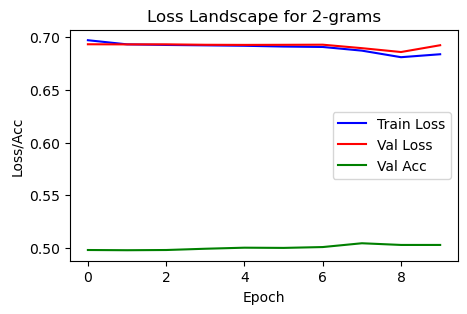

In [29]:
plt.figure(figsize=(5,3))
epoch_list = [i for i in range(epochs)]
plt.plot(epoch_list,training_history['history']['train_loss'],label= 'Train Loss',c='b')
plt.plot(epoch_list,training_history['history']['val_loss'],label= 'Val Loss',c='r')
plt.plot(epoch_list,training_history['history']['accuracy'], label = 'Val Acc',c='g')
plt.legend()
plt.title(f'Loss Landscape for {ngram_size}-grams')
plt.ylabel('Loss/Acc')
plt.xlabel('Epoch')
# plt.savefig("loss.png", bbox_inches="tight")

Check Test Data
- Confusion Matrix
- Accuracy
- ROC Curve
- ROC AUC Score
- PR AUC Curve
- PR Score
- F1 Score

In [30]:
correct_predictions = 0
total_predictions = 0
model.to(device)
model.eval()
with torch.inference_mode():
        for batch_idx, batch in enumerate(test_loader):#tqdm(enumerate(train_loader)):
                input_data = batch['tokens'].to(device).to(torch.float64)
                lengths_data = batch['lengths'].to(device)
                label_data = batch['label'].to(device).to(torch.float64).unsqueeze(1)
                
                predictions = (model(input_data,lengths_data)>0.5).long()
                correct_predictions += (label_data.long()==predictions).sum().item()
                total_predictions += label_data.shape[0]

accuracy = correct_predictions / total_predictions
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.49884


              precision    recall  f1-score   support

         0.0     0.4500    0.0058    0.0114     12500
         1.0     0.4997    0.9930    0.6648     12500

    accuracy                         0.4994     25000
   macro avg     0.4748    0.4994    0.3381     25000
weighted avg     0.4748    0.4994    0.3381     25000



<Figure size 500x400 with 0 Axes>

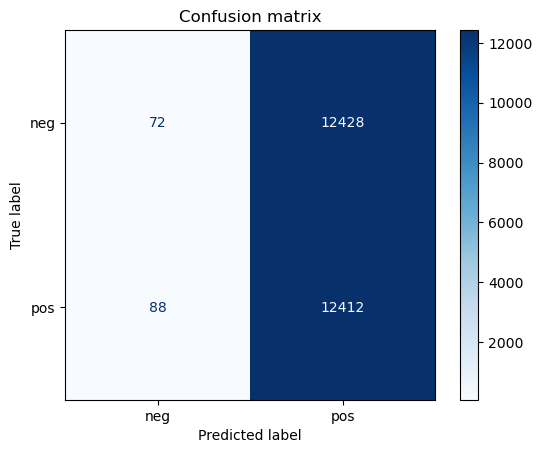

<Figure size 500x400 with 0 Axes>

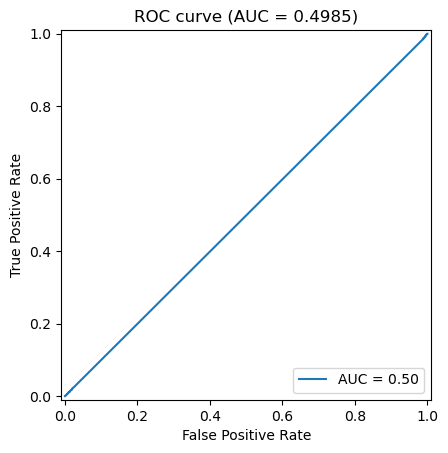

<Figure size 500x400 with 0 Axes>

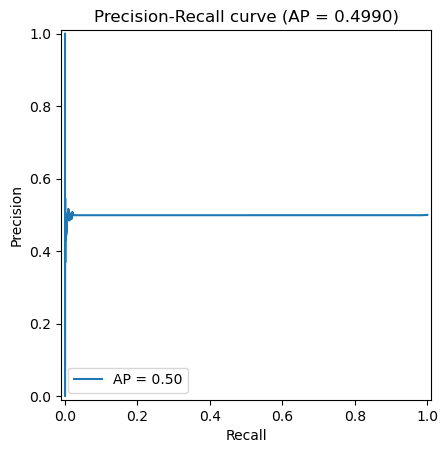

Best threshold by F1: 0.43 F1: 0.6667377853637722


In [31]:
y_true, y_pred, y_probs = outputs(model, test_loader, device=device)
metrics = compute_metrics(y_true, y_pred, y_probs)
print(metrics['report'])
plot_confusion_matrix(y_true, y_pred, normalize=None)   # or normalize='true'
# plt.savefig("confusion.png", bbox_inches="tight")
plot_roc_curve(y_true, y_probs)
# plt.savefig("roc.png", bbox_inches="tight")
plot_precision_recall(y_true, y_probs)
# plt.savefig("precisionrecall.png", bbox_inches="tight")
best_t, best_f1, sweep = threshold_sweep(y_true, y_probs)
print("Best threshold by F1:", best_t, "F1:", best_f1)

## Sequence-to-sequence learning

### 11.5 Beyond text classification: Sequence-to-sequence learning

- Takes a sequeence as input and returns a new sequence]
- Successful applications
    - Machine translation
    - Text summarization
    - Question answering
    - Chatbots
    - Text generation

- During training
    - encoder: turns source sequence into an intermediate representation
    - decoder: predicts the next token $i$ in the target sequence by looking at both previous tokens $(0$ to $i-1)$ and encoded source sequence

- During inference
    - No access to the target sequence, generate it one token at a time
    - Encoded source seuqence from the encoder
    - Decoder looks at encoded source sequence and an initial "seed" token such as "[start]" to predict the first real token
    - Predicted sequence so far is sent back into the decoder to generate the next token until generating a stop token such as "[end]"

11.5.1 A machine translation example

- Grated Recurrent Unit (GRU)
    - Type of RNN
    - Ignores unimportant features
    - No context variable

In [ ]:
# text_file = 'data/datasets/spa-eng/spa.txt'
# with open(text_file) as f:
#     lines = f.read().split("\n")[:-1]
# text_pairs = []
# for line in lines:
#     english, spanish = line.split('\t')
#     spanish = "[start] " + spanish + " [end]"
#     text_pairs.append(english,spanish)

# # import random
# # print(random.choice(text_pairs))

# # Create train, val, anbd test samples
# import random
# random.seed(0)
# random.shuffle(text_pairs)
# num_val_samples = int(0.15*len(text_pairs))
# num_train_samples = len(text_pairs) - 2*num_val_samples
# train_pairs = text_pairs[:num_train_samples]
# val_pairs = text_pairs[num_train_samples:num_train_samples+num_val_samples]
# test_pairs = text_pairs[num_train_samples+num_val_samples:]

# English standardizer
# import tensorflow as tf
# import string
# import re
# def english_standardize(input_string):
#     # Lowercase
#     text = input_string.lower()
#     # Remove punctuation (keep only letters, numbers, spaces)
#     text = re.sub(r"[^a-z0-9\s]", "", text)
#     return {"text": text}

# strip_chars = string.puncuation + "¿"
# strip_chars = strip_chars.replace("[",'')
# strip_chars = strip_chars.replace(']',"")
# # Spanish standardizer, need to keep [ and ] around the [start] and [end] tokens to differentiate between the words start and end
# def spanish_standardize(input_string):
#     lowercase = tf.strings.lower()
#     return tf.strings.regex_replace(lowercase, f'[{re.escape(strip_chars)}]','')

# def tokenize(batch,ngram_size):
#     if ngram_size==1:
#         return {"tokens": batch["text"].split()}
#     else:
#         tokens = batch["text"].split()
#         ngrams = []
#         for i,token in enumerate(tokens):
#             for j in range(0,ngram_size,1):
#                 if i+j+1<len(tokens)-1:
#                     ngrams.append( " ".join(tokens[i:i+j+1]) )
#         return {"tokens": ngrams}


# def create_vocab(dataset,tokenizer,maximum_words_in_vocab):
#     # Build a list of all posible words (tokens)
#     train_tokens_list = []
#     max_seq_length = 0
#     for sample in dataset["train"].map(tokenizer, batched=False):
#         train_tokens_list.append(sample["tokens"])
#         if len(sample["tokens"])>max_seq_length:
#             max_seq_length = len(sample["tokens"])

#     # Build a dictionary ordered by word frequency
#     counter = Counter(token for tokens in train_tokens_list for token in tokens)

#     # Build vocab dictionary with at most 20k of the most frequent
#     vocab = {"<pad>": 0, "<unk>": 1}
#     for i, word in enumerate(counter.keys(), start=2):
#         if i>=maximum_words_in_vocab:
#             break
#         vocab[word] = [i,counter[word]]
#     return vocab, max_seq_length

# class VecFuncs():
#     def __init__(self, vocabulary):
#         self.vocab = vocabulary

#     def vectorize_fn_multihot(self,tokens):
#         temp_list = [0]*len(self.vocab)
#         for token in tokens:
#             temp_list[self.vocab.get(token,(1,1))[0]] = 1
#         return temp_list

#     # Term Frequency- Inverse Document Frequency Normalization
#     def vectorize_fn_tf_idf(self,tokens):
#         temp_list = [0]*len(self.vocab)
#         for token in tokens:
#             temp_list[self.vocab.get(token,(1,1))[0]] = self.td_idf(token,tokens)
#         return temp_list

#     # Function to map tokens → IDs (vectors)
#     def vectorize_fn(self,tokens):
#         return [self.vocab.get(token,(1,1))[0] for token in tokens]

#     def td_idf(self, term, tokens):
#         term_freq = tokens.count(term)
#         doc_freq = math.log(float(self.vocab.get(term,(1,1))[1])+1.)
#         return term_freq / doc_freq

# def collate_fn(batch,vocab,vect_function):
#     # for each sample in the batch, take the tokens and vectorize them based on the dictionary
#     token_ids = [torch.tensor(vect_function(item["tokens"])) for item in batch]
#     # Compute true lengths before padding
#     lengths = torch.tensor([len(seq) for seq in token_ids])
#     # create a label tensor
#     labels = torch.tensor([item["label"] for item in batch])

#     # Pad sequences in the batch
#     token_ids_padded = pad_sequence(token_ids, 
#                                     batch_first=True, # puts the batch dimension as first one in shape, rather than longest sequence length
#                                     padding_value=vocab["<pad>"]) # pad with 0s

#     return {"tokens": token_ids_padded, "lengths": lengths, "label": labels}

# maximum_words_in_vocab = 15000
# train_english_texts = [english_standardize(pair[0]) for pair in train_pairs]
# train_spanish_texts = [spanish_standardize(pair[1]) for pair in train_pairs]
# ngram_size=1
# tokenizer = partial(tokenize, ngram_size = ngram_size)
# source_vocab, max_eng_seq = create_vocab(train_english_texts,tokenizer,maximum_words_in_vocab)
# target_vocab, max_spa_seq = create_vocab(train_spanish_texts,tokenizer,maximum_words_in_vocab)

# # Apply tokenization
# train_english_tokens = train_english_texts.map(tokenizer, batched=False)
# train_spanish_tokens = train_spanish_texts.map(tokenizer, batched=False)

# source_vectorizer = VecFuncs(source_vocab).vectorize_fn
# target_vectorizer = VecFuncs(target_vocab).vectorize_fn
# train_english_vecs = [source_vectorizer(tokens) for tokens in train_english_tokens]
# train_spanish_vecs = []
# for tokens in train_spanish_tokens:
#     train_spanish_vecs.append([0].append(target_vectorizer(tokens))) # add one to each sequence length

# batch_size = 64

# def format_dataset(eng,spa):
#     eng = train_english_vecs # source_vectorization(eng)
#     spa = train_spanish_vecs # target_vectorization(spa)
#     return ({'english':eng, 'spanish':spa[:,-1]}, spa[:,1:])

# def make_dataset(pairs):
#     eng_texts,spa_tests = zip(*pairs)
#     eng_texts = list(eng_texts)
#     spa_texts = list(spa_texts)
#     dataset = tf.data.Dataset.from_tensor_slices((eng_texts,spa_texts))
#     dataset = dataset.batch(batch_size)
#     dataset = dataset.map(format_dataset, num_parallel_calls = 4)
#     return dataset.shuffle(0).prefetch(16).cache()

# train_ds = make_dataset(train_pairs)
# val_ds = make_dataset(val_pairs)


# Test data and Translate new sentences
# import numpy as np
# spa_index_lookup = dict(zip( range(len(target_vocab)), target_vocab))
# max_decoded_sentence_length = 20
# def decode_sequence(input_sentences):
#     tokenized_input_sentence = source_vectorization([input_sentences])
#     decoded_sentence = 'start'
#     for i in range(max_decoded_sentence_length):
#         tokenized_target_sentence = target_vectorization([decoded_sentence])
#         next_token_predictions = seq2seq_rnn.predict([tokenized_input_sentences, tokenized_target_sentence])
#         sampled_token_index = np.argmax(next_token_predictions[0,i,:])
#         sampled_token = spa_index_lookup[sampled_token_index]
#         decoded_sentence += " " + sampled_token
#         if sampled_token=="end":
#             break
#     return decoded_sentence

# test_eng_texts = [pair[0] for pair in test_pairs]
# for _ in range(20):
#     input_sentence = random.choice(test_eng_texts)
#     print('-')
#     print('English: ',input_sentence)
#     print('Spanish: ',decode_sequence(input_sentence))


# class Seq2SeqRNN(nn.Module):
#     def __init__(self, input_size, hidden_dim, vocab_size):
#         super(Seq2SeqRNN, self).__init__()
#         self.vocab_size = vocab_size
#         # self.embed = OneHot(num_embeddings=len(vocab))  # or nn.Embedding # make embed size len(vocab)
#         self.source_embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim, padding_idx=vocab["<pad>"], mask_zero = True) # change embed_size
#         self.past_target_embed = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim, padding_idx=vocab["<pad>"], mask_zero = True)
#         self.gru_encoder = nn.GRU(input_size = input_size, hidden_size = hidden_dim, num_layers=1, bias=True, batch_first=True, bidirectional=True)
#         self.gru_decoder = nn.GRU(input_size = hidden_dim, hidden_size = hidden_dim, num_layers=1, bias=True, batch_first=True, bidirectional=False)
#         self.dropout = nn.Dropout(p=0.5)
#         self.fc = nn.Linear(in_features = hidden_dim, out_features = vocab_size, bias = True, dtype = torch.float64)
#         self.softmax = nn.Softmax()


#     def forward(self, source, past_target): # lengths not needed in original model
#         # x1: [batch, seq] LongTensor
#         x = self.source_embed(source)
#         encoded_source = self.gru_encoder(x)
#         encoded_past_target = self.past_target_embed(past_target)
#         x = self.gru_decoder(encoded_past_target, initial_state = encoded_source)
#                # unpack
#         unpacked, _ = pad_packed_sequence(x, batch_first=True)  # [batch, max_len, 2*hidden_dim]
#         # mask for mean pooling
#         mask = (torch.arange(unpacked.size(1), device=lengths.device)[None, :] < lengths[:, None]).unsqueeze(-1)
#         masked_out = unpacked * mask
#         pooled = masked_out.sum(dim=1) / lengths.unsqueeze(1)
#         out = self.dropout(pooled)
#         # out = self.dropout(last_hidden)
#         out = self.fc(out)
#         # logits w/o sigmoid
#         return self.softmax(out)
    
# # How the model needs to be initialized
# seq2seq_rnn = Seq2SeqRNN([source,past_target], target_next_step)
# loss_fn = nn.CrossEntropyLoss()

In [3]:
'''
Process data
'''
from utils_seq2seq import *
# load text file, create pairs, standardize
text_file = 'data/datasets/spa-eng/spa.txt'
pairs = []
with open(text_file, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line:
            continue
        parts = line.split("\t")
        if len(parts) < 2:
            continue
        en, es = parts[0], parts[1]
        pairs.append((english_standardize(en), "[start] "+spanish_standardize(es)+" [end]"))

# shuffle + split
random.seed(0)
random.shuffle(pairs)
n = len(pairs)
n_val = int(0.15 * n)
n_test = n_val
n_train = n - n_val - n_test
train_pairs = pairs[:n_train]
val_pairs = pairs[n_train:n_train+n_val]
test_pairs = pairs[n_train+n_val:]

# Tokenize
train_source_tokens = [tokenize_text(p[0]) for p in train_pairs]
train_target_tokens = [tokenize_text(p[1]) for p in train_pairs]

max_seq_length = find_max_seq_length(train_source_tokens+train_target_tokens)

# Index
max_vocab_size = 15000
min_word_freq = 1
source_vocab, source_inv = build_vocab(train_source_tokens, max_size=max_vocab_size, min_freq=min_word_freq)
target_vocab, target_inv = build_vocab(train_target_tokens, max_size=max_vocab_size, min_freq=min_word_freq)

pad_idx_source = source_vocab["<pad>"]
pad_idx_target = target_vocab["<pad>"]
unk_idx_target = target_vocab["<unk>"]

train_dataset = TranslationDataset(train_pairs, source_vocab, target_vocab)
val_dataset = TranslationDataset(val_pairs, source_vocab, target_vocab)
test_dataset = TranslationDataset(test_pairs, source_vocab, target_vocab)

collate_function = partial(collate_seq2seq, source_pad_idx=pad_idx_source, target_pad_idx=pad_idx_target)

batch_size = 64
train_loader = DataLoader(train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True,
                          collate_fn=collate_function)
val_loader   = DataLoader(val_dataset, 
                          batch_size=batch_size, 
                          shuffle=False,
                          collate_fn=collate_function)

In [42]:
epochs = 15
model = Seq2SeqGRU(source_vocab_size = len(source_vocab), 
                   target_vocab_size = len(target_vocab), 
                   embed_dim=128, 
                   enc_hidden=128, 
                   dec_hidden=128,
                   pad_idx_source=pad_idx_source, 
                   pad_idx_target=pad_idx_target).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss(ignore_index=pad_idx_target)


In [43]:
number_of_parameters = 0
for i,params in enumerate(model.parameters()):
  number_of_parameters += params.flatten().shape[0]
print('Number of Parameters: ', number_of_parameters)

Number of Parameters:  5836314


In [44]:
torchinfo.summary(model, 
                  input_data=[torch.randint(0,len(source_vocab),(batch_size,20)), 
                              torch.randint(1,10,(batch_size,)), 
                              torch.randint(0,len(target_vocab),(batch_size,20)),
                              torch.randint(1,10,(batch_size,)) ],
                  col_names=["input_size", "output_size", "num_params", "trainable"],
                  depth=3 )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
Seq2SeqGRU                               [64, 20]                  [64, 9, 15002]            --                        True
├─Embedding: 1-1                         [64, 20]                  [64, 20, 128]             1,650,688                 True
├─GRU: 1-2                               [311, 128]                [311, 256]                198,144                   True
├─Linear: 1-3                            [64, 256]                 [64, 128]                 32,896                    True
├─Embedding: 1-4                         [64, 20]                  [64, 20, 128]             1,920,256                 True
├─GRU: 1-5                               [330, 128]                [330, 128]                99,072                    True
├─Linear: 1-6                            [64, 9, 128]              [64, 9, 15002]            1,935,258                 True
Tot

In [45]:
training_history = training_seq2seq(train_loader,
                                        val_loader,
                                        epochs,
                                        loss_fn,
                                        model,
                                        optimizer,
                                        regularize=False)

Epoch 1 | Train Loss: 4.5720 | Val Loss: 3.5693 | Best Val Loss: 3.5693
Epoch 2 | Train Loss: 3.2362 | Val Loss: 2.9987 | Best Val Loss: 2.9987
Epoch 3 | Train Loss: 2.6835 | Val Loss: 2.7061 | Best Val Loss: 2.7061
Epoch 4 | Train Loss: 2.3147 | Val Loss: 2.5261 | Best Val Loss: 2.5261
Epoch 5 | Train Loss: 2.0425 | Val Loss: 2.4167 | Best Val Loss: 2.4167
Epoch 6 | Train Loss: 1.8298 | Val Loss: 2.3609 | Best Val Loss: 2.3609
Epoch 7 | Train Loss: 1.6606 | Val Loss: 2.3171 | Best Val Loss: 2.3171
Epoch 8 | Train Loss: 1.5195 | Val Loss: 2.2986 | Best Val Loss: 2.2986
Epoch 9 | Train Loss: 1.4010 | Val Loss: 2.2932 | Best Val Loss: 2.2932
Epoch 10 | Train Loss: 1.3004 | Val Loss: 2.3004 | Best Val Loss: 2.2932
Epoch 11 | Train Loss: 1.2126 | Val Loss: 2.3104 | Best Val Loss: 2.2932
Epoch 12 | Train Loss: 1.1374 | Val Loss: 2.3285 | Best Val Loss: 2.2932
Epoch 13 | Train Loss: 1.0708 | Val Loss: 2.3509 | Best Val Loss: 2.2932
Epoch 14 | Train Loss: 1.0128 | Val Loss: 2.3694 | Best Val 

### Evaluate Model

In [46]:
# --- Saving ---
# torch.save(model.state_dict(), "weights/Seq2SeqGRU.pth")

# --- Loading ---
# create model instance
model = Seq2SeqGRU(source_vocab_size = len(source_vocab), 
                   target_vocab_size = len(target_vocab), 
                   embed_dim=128, 
                   enc_hidden=64, 
                   dec_hidden=64,
                   pad_idx_source=pad_idx_source, 
                   pad_idx_target=pad_idx_target).to(device) 
model.load_state_dict(torch.load("weights/Seq2SeqGRU.pth"))
model.eval() 

Seq2SeqGRU(
  (source_embed): Embedding(12896, 128, padding_idx=0)
  (target_embed): Embedding(15002, 128, padding_idx=0)
  (encoder): GRU(128, 64, batch_first=True, bidirectional=True)
  (decoder): GRU(128, 64, batch_first=True)
  (enc_to_dec): Linear(in_features=128, out_features=64, bias=True)
  (out_proj): Linear(in_features=64, out_features=15002, bias=True)
)

In [47]:
def greedy_decode(model, source_seq, source_len, target_vocab, max_len=50):
    model.eval()

    start_idx = target_vocab["[start]"]
    end_idx = target_vocab["[end]"]
    with torch.inference_mode():
        source = torch.tensor(source_seq, dtype=torch.long).unsqueeze(0).to(device)  # [1, source_len]
        source_lens = torch.tensor([source_len], dtype=torch.long).to(device)
        dec_init, _ = model.encode(source, source_lens)  # [1,1,dec_hidden]
        # start token
        cur_input = torch.tensor([[start_idx]], dtype=torch.long).to(device)  # [1,1]
        generated = []
        hidden = dec_init
        for t in range(max_len):
            embedded = model.target_embed(cur_input)  # [1,1,embed]
            out, hidden = model.decoder(embedded, hidden)  # out: [1,1,dec_hidden]
            logits = model.out_proj(out.squeeze(1))  # [1, V]
            next_id = torch.argmax(logits, dim=-1).item()
            if next_id == end_idx:
                break
            generated.append(next_id)
            cur_input = torch.tensor([[next_id]], dtype=torch.long).to(device)
        return [i for i in generated]  # convert ids -> tokens

In [48]:
ex_length = len(test_dataset.__getitem__(0)['source'])
source_seq = test_dataset.__getitem__(0)["source"]   # list of token IDs
target = greedy_decode(model, 
                        source_seq=source_seq, 
                        source_len=torch.tensor(len(test_dataset.__getitem__(0)['source'])).reshape(1,1), 
                        target_vocab = target_vocab, 
                        max_len=max_seq_length)

In [49]:
def convert_token_ids(token_idxs,vocab_inv):
    true_list = []
    for idx in token_idxs:
        if vocab_inv[idx] not in {"[start]","[end]"}:
            true_list.append(vocab_inv[idx])
    return ' '.join(true_list)

In [50]:
true_source = convert_token_ids(token_idxs=test_dataset.__getitem__(0)['source'],
                  vocab_inv=source_inv)
true_target = convert_token_ids(token_idxs=test_dataset.__getitem__(0)['target'],
                  vocab_inv=target_inv)
pred_target = convert_token_ids(token_idxs=target,
                  vocab_inv=target_inv)

print('True Source: ', true_source)
print('True Target: ', true_target)
print('Pred Target: ', pred_target)

True Source:  ill call him tonight
True Target:  la llamaré por teléfono esta noche
Pred Target:  judío orador 110 ciruelo decírnoslo irritado sugerir cantina aviso cerrojo siguiente rescate enorme poderse carpa decidiera adivina modesto milagro habláis meca piense celebridad hablaría consiga propósito conseguí desearías teresa picas inyección déjelo madrugar olvidarme hembra creo ¿desperté «sí» detener salirse vaca tartamudo anonadado esperaremos leyes aumentar correo correo confiables renunció ponlo sírvete sírvete pierde perdóneme


Issues with RNN approach

- Source representation entirely in encoder state vectors which limits size and complexity of sentences you can translate
- RNN struggle to deal with logn sequences as they forget about the past, cannot holdonto long term context